In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("simulations.csv")

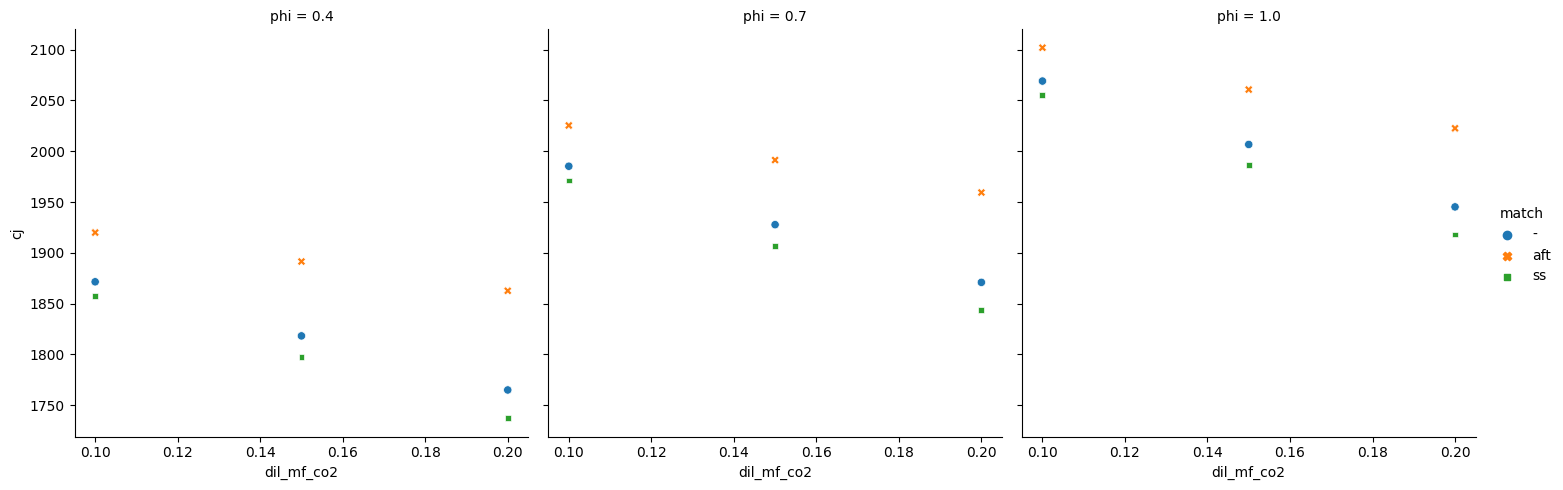

In [3]:
sns.relplot(
    x="dil_mf_co2",
    y="cj",
    hue="match",
    style="match",
    data=data,
    col="phi",
)

In [20]:
co2 = data[data["diluent"] == "CO2"].set_index(["dil_mf_co2", "phi"])["cj"]
n2_aft = data[data["match"] == "aft"].set_index(["dil_mf_co2", "phi"])["cj"]
n2_ss = data[data["match"] == "ss"].set_index(["dil_mf_co2", "phi"])["cj"]

In [37]:
err_pct_aft = co2.sub(n2_aft).abs().div(co2).mul(100).rename("err_cj").reset_index()
err_pct_ss = co2.sub(n2_ss).abs().div(co2).mul(100).rename("err_cj").reset_index()
err_pct_aft["match"] = "aft"
err_pct_ss["match"] = "ss"

In [38]:
err_pct_aft

,dil_mf_co2,phi,err_cj,match
0,0.10,0.4,2.591142,aft
1,0.15,0.4,4.029116,aft
2,0.20,0.4,5.534406,aft
3,0.10,0.7,2.022236,aft
4,0.15,0.7,3.300610,aft
5,0.20,0.7,4.728813,aft
6,0.10,1.0,1.587134,aft
7,0.15,1.0,2.693587,aft
8,0.20,1.0,3.978715,aft


In [39]:
err_data = pd.concat((err_pct_aft, err_pct_ss))

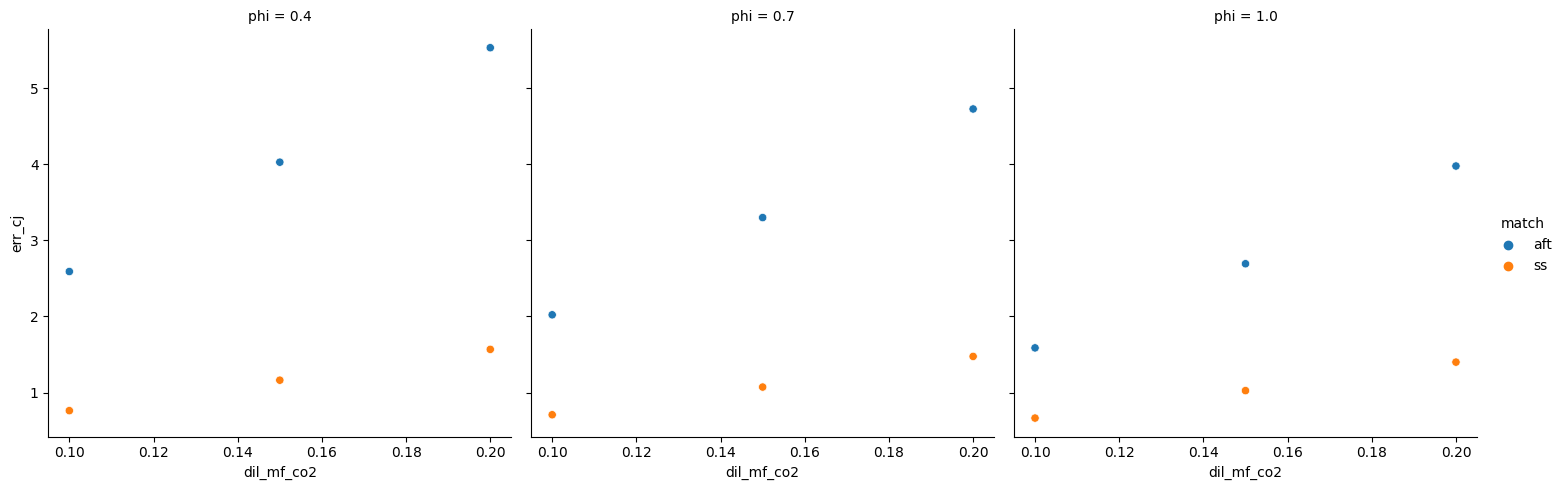

In [42]:
sns.relplot(x="dil_mf_co2", y="err_cj", hue="match", col="phi", data=err_data)